<a href="https://colab.research.google.com/github/Aleena24/CV_lab/blob/main/lab3_image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!pip install opencv-python

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#Load the image
image = cv2.imread("/content/drive/MyDrive/research_dataset/BSD100/87046.png")


In [39]:
# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

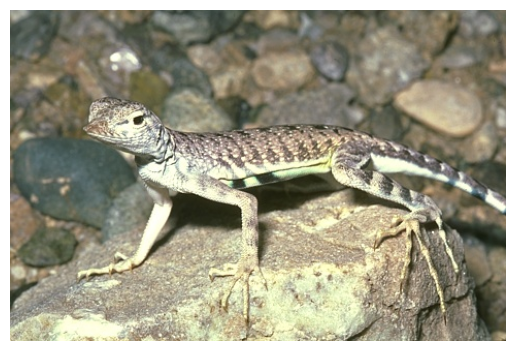

In [40]:
# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Negative image

a negative image is essentially the inversion of a traditional or "positive" image. In a negative image, the colors or brightness values of each pixel are inverted relative to the original image. This means that areas that were originally dark become light, and areas that were originally light become dark.

The inversion process typically involves subtracting the original pixel values from the maximum possible value (e.g., 255 for an 8-bit grayscale image or 255 for each channel in a color image). For example, if a pixel in the original image has a value of 100, its corresponding value in the negative image would be 255 - 100 = 155.

In [41]:
# Create a negative image
negative_image = 255 - image

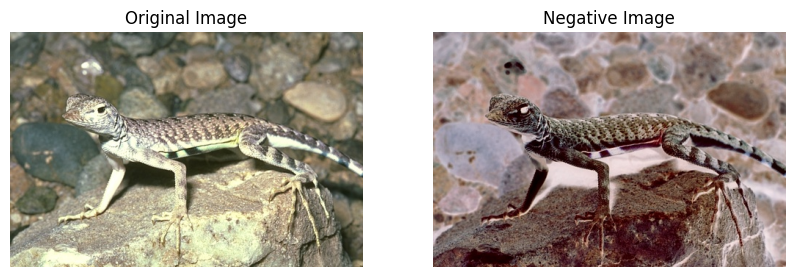

In [42]:
# Plot original and equalized images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.show()

# Gray Level Slicing

a specific range of pixel intensity values is selected and retained, while all other pixel values outside this range are either set to a specific value (e.g., black or white) or modified according to some defined criterion.

In [43]:
# Set the threshold range
low = 100
high = 200

In [44]:
# Apply gray level slicing
sliced_image = np.where((image >= low) & (image <= high), 255, 0).astype(np.uint8)

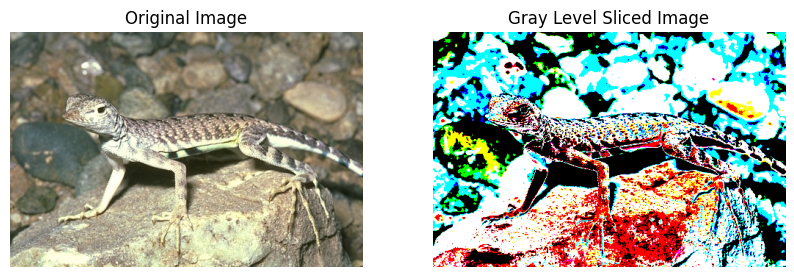

In [45]:
# Plot original and equalized images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(sliced_image, cmap='gray')
plt.title('Gray Level Sliced Image')
plt.axis('off')

plt.show()

# Histogram equalization

# Global Histogram Equalization

 the transformation function is determined based on the cumulative distribution function (CDF) of the entire image. In other words, it operates on the entire image without considering local variations in intensity levels.


In [46]:
# Check the type and shape of the image
print("Image dtype:", image.dtype)
print("Image shape:", image.shape)

Image dtype: uint8
Image shape: (321, 481, 3)


In [47]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

In [48]:
# Calculate histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

The transformation function used in HE is computed based on the cumulative histogram of the entire image.

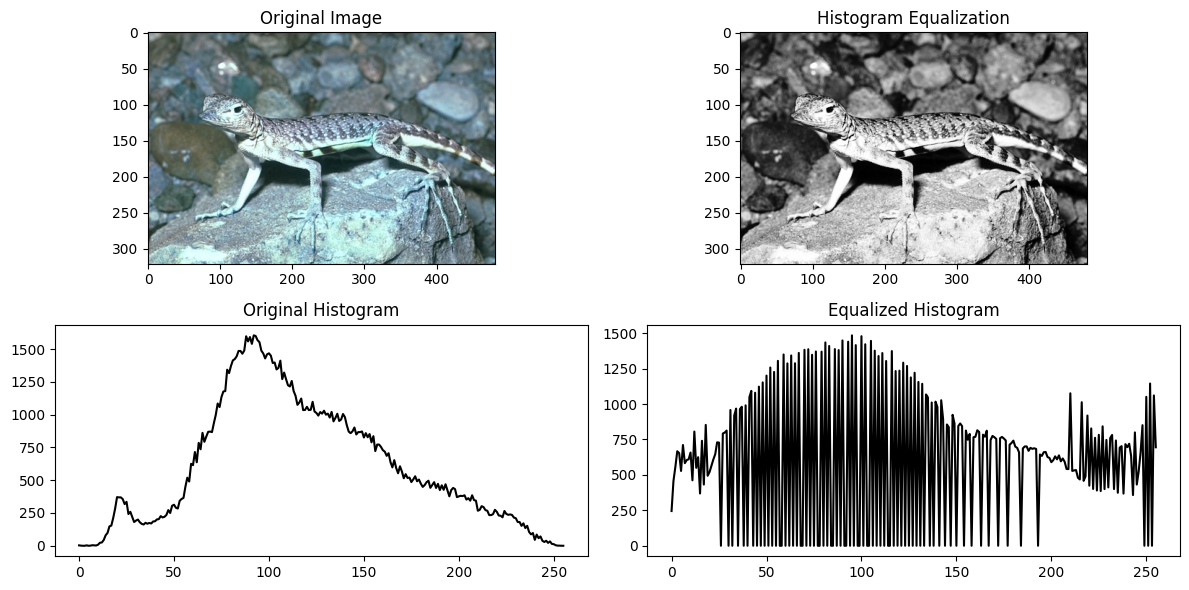

In [49]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 2, 3)
plt.plot(hist_original, color='black')
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()

# Adaptive Histogram Equalization

AHE divides the image into smaller regions or tiles and applies histogram equalization independently to each tile.

In [50]:
# Create a CLAHE object (Arguments are optional)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Apply CLAHE to the image
equalized_img = clahe.apply(gray_image)


computes multiple transformation functions based on local regions within the image. This allows for better preservation of local contrast and details, especially in images with varying illumination across different regions.

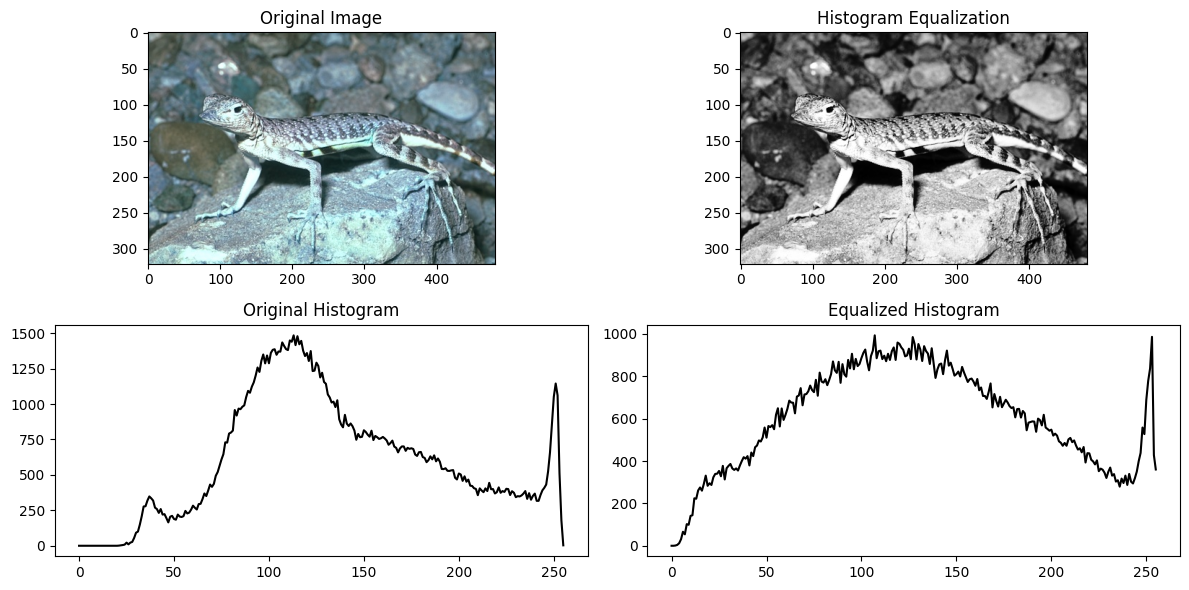

In [51]:
# Compute histograms
hist_orig = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_equ = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
hist_clahe = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 2, 3)
plt.plot(hist_orig, color='black')
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.plot(hist_equ, color='black')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()